<a href="https://colab.research.google.com/github/mariusblarsen/ae-attack-pipeline/blob/SAA-attack/SAA_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. Generate adversarial example

## Sparse-Adversarial-Attack

In [1]:
!git clone https://github.com/mariusblarsen/ae-attack-pipeline

Cloning into 'ae-attack-pipeline'...
remote: Enumerating objects: 1512, done.
remote: Counting objects: 100% (1512/1512), done.
remote: Compressing objects: 100% (970/970), done.
remote: Total 1512 (delta 538), reused 1491 (delta 521), pack-reused 0
Receiving objects: 100% (1512/1512), 15.46 MiB | 21.77 MiB/s, done.
Resolving deltas: 100% (538/538), done.


In [2]:
%cd ae-attack-pipeline

/content/ae-attack-pipeline


In [ ]:
!git pull origin SAA-attack

In [4]:
!git checkout -b SAA-attack

Switched to a new branch 'SAA-attack'


In [5]:
!pip install -r Tianchi04/requirements.txt

     |████████████████████████████████| 324 kB 5.4 MB/s 
     |████████████████████████████████| 1.2 MB 38.3 MB/s 
     |████████████████████████████████| 185 kB 50.8 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.14-cp37-cp37m-linux_x86_64.whl size=31471118 sha256=4cd5b5c1611d065639bf9d6744d17287b013192f2f02dcf60f28c7f2eeff5f2f
  Stored in directory: /root/.cache/pip/wheels/5e/54/62/69c99dc3c9937bca64126f81cbe315ae6c8e6e98c43fa7392d
  Created wheel for terminaltables: filename=terminaltables-3.1.0-py3-none-any.whl size=15354 sha256=0827f4d22c7fd1bc0655cffcc3af62d5fe1354c334d88ff017fa62d0ee7912ab
  Stored in directory: /root/.cache/pip/wheels/ba/ad/c8/2d98360791161cd3db6daf6b5e730f34021fc9367d5879f497
Successfully built mmcv-full terminaltables


### Fetch checkpoints folder from gdrive

In [29]:
!ls

assets	     checkpoints   improve_2.py  models.py    README.md		tool
attack_1.py  eval.py	   improve_3.py  output_data  requirements.txt	utils
attack_2.py  final	   infer.py	 pixel.json   select1000_new
attack_3.py  improve_1.py  mmdetection	 __pycache__  select1000_new_p


In [19]:
%cd ..


/content


In [21]:
# Replace path to where the checkpoint files folder is
%cd drive/MyDrive/Studie/Prosjekttoppgave/

/content/drive/MyDrive/Studie/Prosjekttoppgave


In [22]:
%cp -av Colab\ assets checkpoints

'Colab assets' -> 'checkpoints'
'Colab assets/yolov4.cfg' -> 'checkpoints/yolov4.cfg'
'Colab assets/yolov4.weights' -> 'checkpoints/yolov4.weights'
'Colab assets/yolov4.pth' -> 'checkpoints/yolov4.pth'
'Colab assets/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth' -> 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'


In [23]:
%mv checkpoints ../../../../ae-attack-pipeline/Tianchi04/

In [24]:
%cd ../../../../ae-attack-pipeline/Tianchi04/
!ls checkpoints

/content/ae-attack-pipeline/Tianchi04
faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth  yolov4.pth
yolov4.cfg					   yolov4.weights


In [110]:
!rm -rf ./select1000_new_p/.ipynb_checkpoints/

In [111]:
!python eval.py

100% 1/1 [00:02<00:00,  2.20s/it]
convolution havn't activate linear
convolution havn't activate linear
convolution havn't activate linear
  0% 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
100% 1/1 [00:00<00:00,  1.72it/s]
Overall score:  1.6320000000000001
Saving into whitebox_yolo_overall_score.json...
/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
Use load_from_local loader
  0% 0/1 [00:00<?, ?it/s]/usr/local/lib/pyt

In [52]:
!rm -rf ../images/.ipynb_checkpoints/

In [104]:
!ls

assets	     checkpoints   improve_2.py  models.py    README.md		tool
attack_1.py  eval.py	   improve_3.py  output_data  requirements.txt	utils
attack_2.py  final	   infer.py	 pixel.json   select1000_new
attack_3.py  improve_1.py  mmdetection	 __pycache__  select1000_new_p


In [35]:
# Copy and move image from assets folder, used in attack files
!mkdir ../images

%cp assets/1.jpg ../images/2.jpg

mkdir: cannot create directory ‘../images’: File exists


In [101]:
!ls final

In [122]:
!python attack_3.py --max_iter=250

/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
Use load_from_local loader
files
['2.png']
2.png 2483
/usr/local/lib/python3.7/dist-packages/mmdet/apis/inference.py:73: UserWarning: `LoadImage` is deprecated and will be removed in future releases. You may use `LoadImageFromWebcam` from `mmdet.datasets.pipelines.` instead.
  warnings.warn('`LoadImage` is deprecated and will be removed in '
libpng warning: iCCP: known incorrect sRGB profile
/usr/local/lib/python3.7/dist-packages/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
libpng warning: iCCP: known incorrect sRGB profile
/usr/

# MMDet test

In [120]:
!ls

assets	     checkpoints   improve_2.py  models.py    README.md		tool
attack_1.py  eval.py	   improve_3.py  output_data  requirements.txt	utils
attack_2.py  final	   infer.py	 pixel.json   select1000_new
attack_3.py  improve_1.py  mmdetection	 __pycache__  select1000_new_p


/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


/usr/local/lib/python3.7/dist-packages/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


[[3.2546501e+01 2.9842343e+02 4.9495953e+02 4.9832535e+02 9.5171767e-01]
 [3.3021973e+01 2.8689133e+02 2.5852704e+02 4.9932425e+02 1.9452980e-01]
 [2.3674717e+01 9.7238365e+01 4.9168365e+02 5.0000000e+02 1.5482856e-01]
 [2.5859409e+02 2.9972260e+02 4.7837079e+02 4.9800497e+02 1.0069791e-01]
 [1.4949129e+02 3.4997681e+02 3.9997672e+02 4.9590170e+02 9.9768654e-02]
 [1.5971642e+02 3.1915768e+02 4.6573325e+02 4.4767062e+02 6.3362144e-02]]
[[2.4923198e+02 1.3580038e+02 3.4087149e+02 2.9182678e+02 9.8962843e-01]
 [2.5565433e+02 1.6733099e+02 2.9415976e+02 2.8617950e+02 5.5742543e-02]]


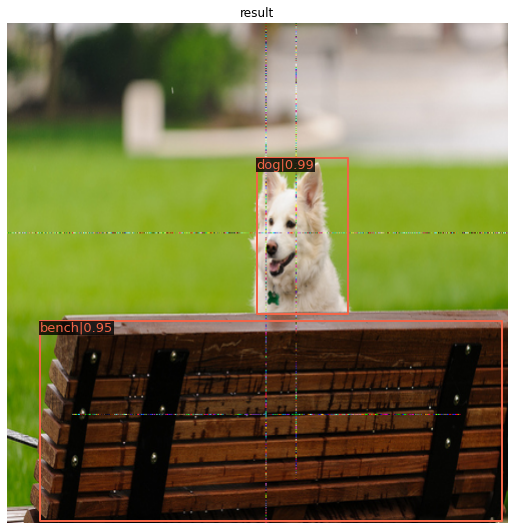

In [123]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot
import mmcv
import numpy as np
# Choose to use a config and initialize the detector
config = './mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
# Setup a checkpoint file to load
checkpoint = './checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'
# initialize the detector
model = init_detector(config, checkpoint, device='cuda:0')

# Use the detector to do inference
img = '../images/2.jpg'
img = 'final/2.png'
result = inference_detector(model, img)
for res in result:
  if res.any():
    if res[0][4] > 0.3:
      print(res)


show_result_pyplot(model, img, result, score_thr=0.3)

# YOLOv4 test